In [1]:
import cricplot

In [2]:
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

df_match = pd.read_csv('t20s_male_csv2/1273730.csv')

In [4]:
df_match = df_match.drop(columns=['season','start_date'])
df_match['over'] = df_match.ball.astype(str).apply(lambda x:x.split('.')[0]).astype(int)
df_match['ball'] = df_match.ball.astype(str).apply(lambda x:x.split('.')[1]).astype(int)
df_match['runs'] = df_match['runs_off_bat']+df_match['extras']

In [5]:
data_1 = df_match[df_match['batting_team']=='New Zealand'][['over','runs']].groupby('over').sum().runs.to_list()
data_2 = df_match[df_match['batting_team']=='Pakistan'][['over','runs']].groupby('over').sum().runs.to_list()

team1_fow = df_match[(df_match['batting_team'] == "New Zealand") & (~df_match.wicket_type.isnull())].over.to_list()
team2_fow = df_match[(df_match['batting_team'] == "Pakistan") & (~df_match.wicket_type.isnull())].over.to_list()

team1_fow = [i+1 for i in team1_fow]
team2_fow = [i+1 for i in team2_fow]

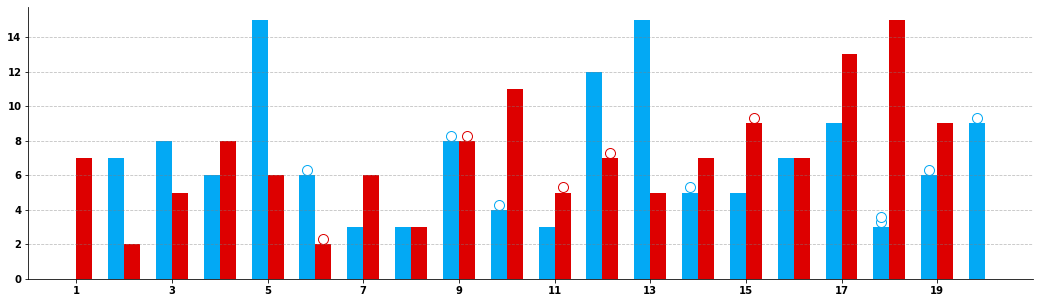

In [6]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot()
cricplot.plot_manhattan(ax,20,data_1,team1_fow,data_2,team2_fow)
# fig

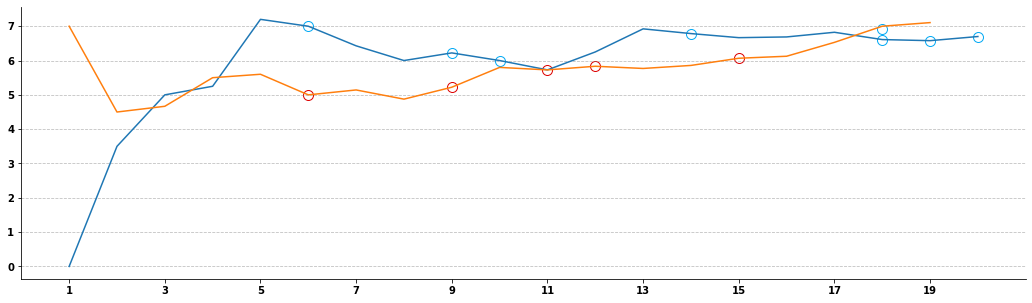

In [7]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot()
cricplot.plot_runrate(ax,20,data_1,team1_fow,data_2,team2_fow)
# cricplot.plot_runrate(ax,20,data_2,team2_fow)
# fig

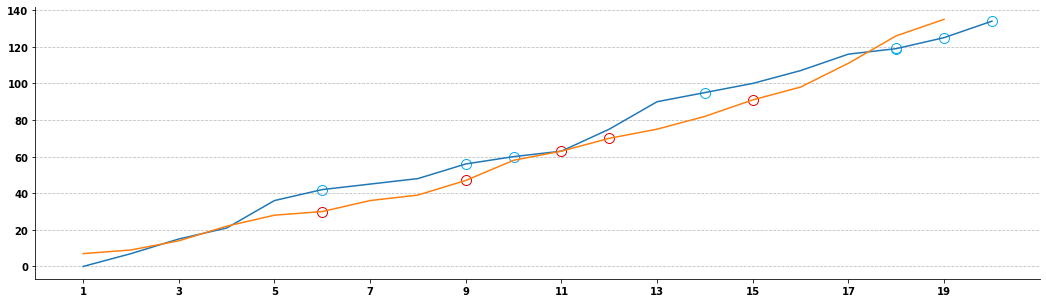

In [8]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot()
cricplot.plot_worm(ax,20,data_1,team1_fow,data_2,team2_fow)
# cricplot.plot_worm(ax,20,data_2,team2_fow)

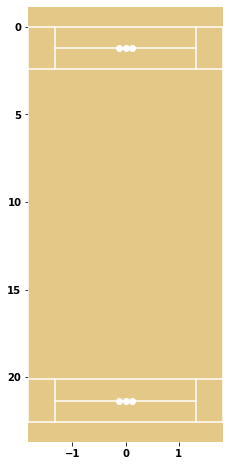

In [11]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

cricplot.draw_pitch(ax=ax)